In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import statsmodels.api as sm
import seaborn as sns
from datetime import datetime

/home/sara/.local/lib/python3.8/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/tmp/ipykernel_10874/1529260697.py:4: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (

In [13]:
#df_d = pd.read_excel(r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\displacements\unhcr-prmn-displacement-dataset-3.xlsx")
df_d = pd.read_csv(r"/home/sara/Documenti/GitHub/Climate-and-conflict/csv/df_lag1_2016_n4_disp_d.csv")
states_gdf_d = gpd.read_file(r"/home/sara/Documenti/GitHub/Climate-and-conflict/Datasets/som_adm_ocha_itos_20230308_shp/som_admbnda_adm1_ocha_20230308.shp")

In [3]:
ban = df_d[df_d['admin1']=='Banadir']

In [23]:
df_d

,index,time,admin1,year,month,TA,PA,DL,TA_lag1,PA_lag1,...,Lower_Shabelle_y,Middle_Juba_y,Middle_Shabelle_y,Mudug_y,Nugaal_y,Sanaag_y,Sool_y,Togdheer_y,Woqooyi_Galbeed_y,sum_disp
0,1380,2016-01,Awdal,2016,1,1.928297,-0.380389,91,2.434685,-0.327348,...,0,9,0,0,6,0,0,0,0,89
1,1380,2016-01,Bakool,2016,1,1.763822,0.482869,91,1.788443,0.451277,...,0,0,0,0,0,0,0,0,0,0
2,1380,2016-01,Banadir,2016,1,0.945574,0.199790,12,0.863304,0.142254,...,0,0,0,0,0,0,0,0,0,0
3,1380,2016-01,Bari,2016,1,2.795627,0.105977,22,3.176753,0.039772,...,0,0,0,0,3,0,0,0,0,31
4,1380,2016-01,Bay,2016,1,1.215756,0.388470,91,1.161055,0.406663,...,0,0,0,0,0,0,0,0,0,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,1463,2022-12,Nugaal,2022,12,0.242491,0.045570,2,0.000450,0.236927,...,0,0,0,0,1378,0,0,0,0,1378
1508,1463,2022-12,Sanaag,2022,12,0.890555,0.055662,17,0.499530,0.099197,...,0,0,0,0,0,465,0,0,0,465
1509,1463,2022-12,Sool,2022,12,0.717891,0.046859,17,0.367087,0.187917,...,0,0,0,170,0,0,514,0,0,684
1510,1463,2022-12,Togdheer,2022,12,1.239001,-0.014982,17,0.894557,0.003856,...,0,0,0,142,0,0,83,366,0,591


In [24]:
#group by year and sum displacements and mean temperature
df_agg = df_d.groupby('time').agg({'sum_disp':'sum','TA':'mean','PA':'mean', 'conflicts': 'sum'}).reset_index()

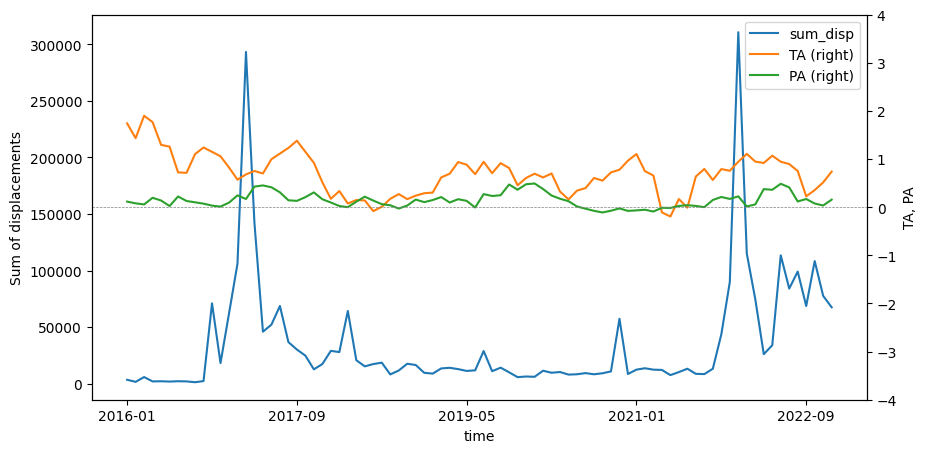

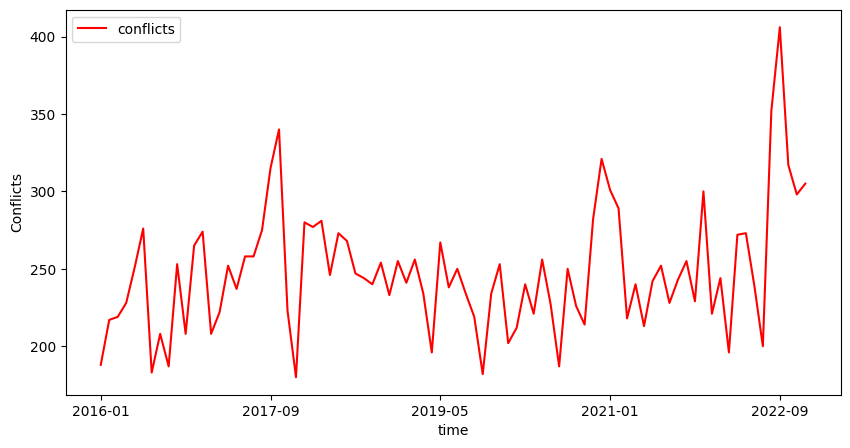

In [26]:
ap = df_agg.copy()
aw = ap[['time','sum_disp','TA','PA']]
aw = aw.set_index('time')

fig1 = aw.plot(secondary_y=['TA','PA'], mark_right=True, figsize=(10,5))
fig1.set_ylabel('Sum of displacements')
fig1.right_ax.set_ylabel('TA, PA')
#ax.set_ylim(-2, 3)
fig1.right_ax.set_ylim(-4, 4)
for i in range(-4, 6):
    plt.axhline(y=i*10, color='grey', linestyle='--', linewidth=0.5)
plt.show()
ay = ap[['time','conflicts']]
ay = ay.set_index('time')
fig2 = ay.plot(color='red', mark_right=True, figsize=(10,5)) 
fig2.set_ylabel('Conflicts')
plt.show()

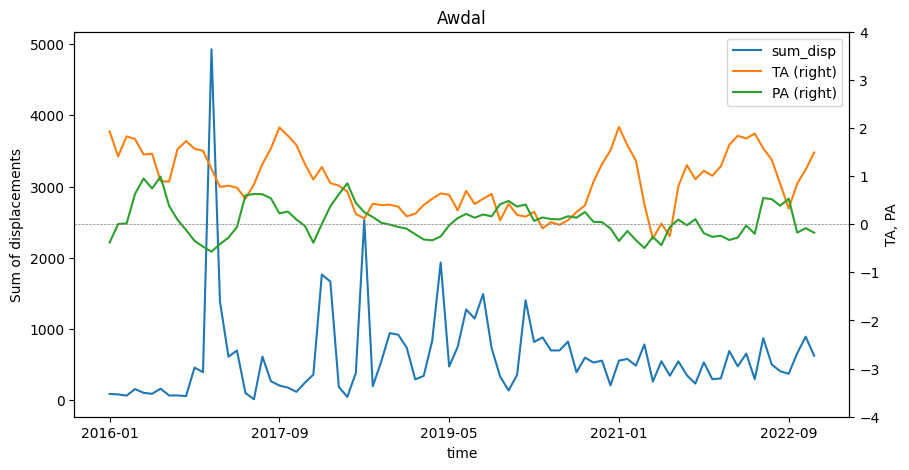

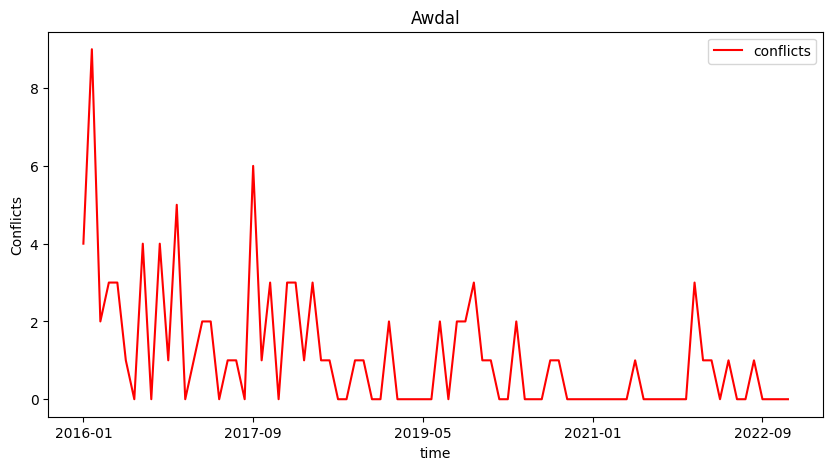

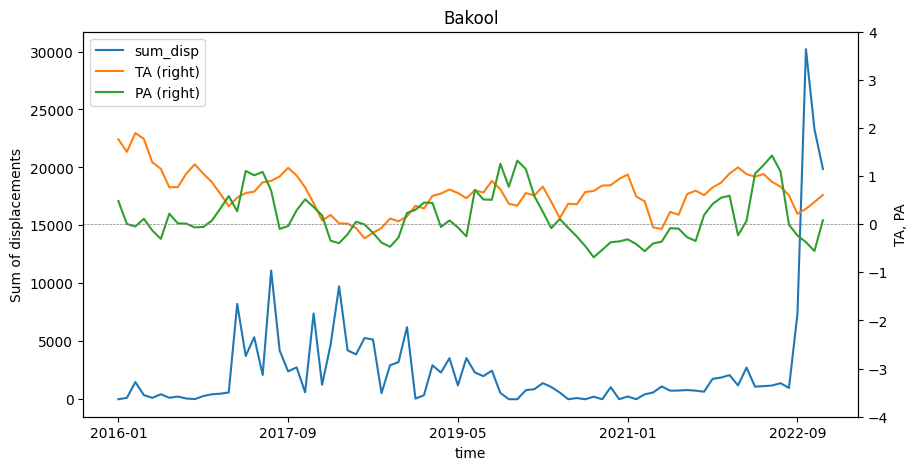

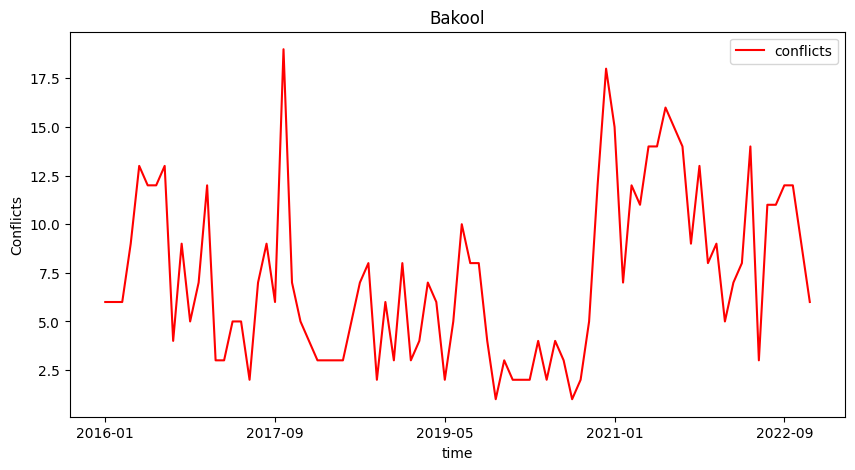

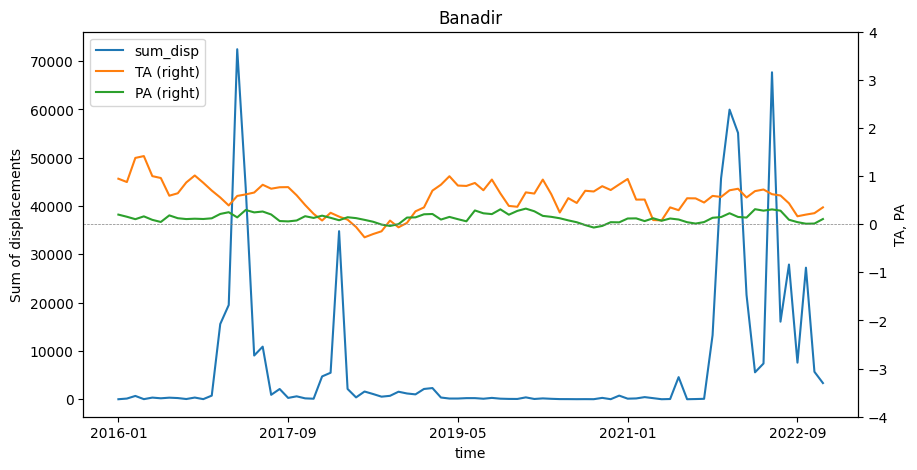

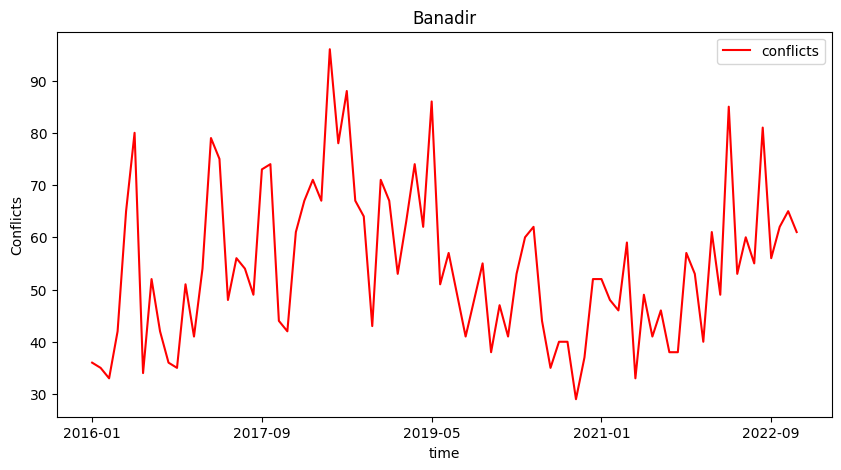

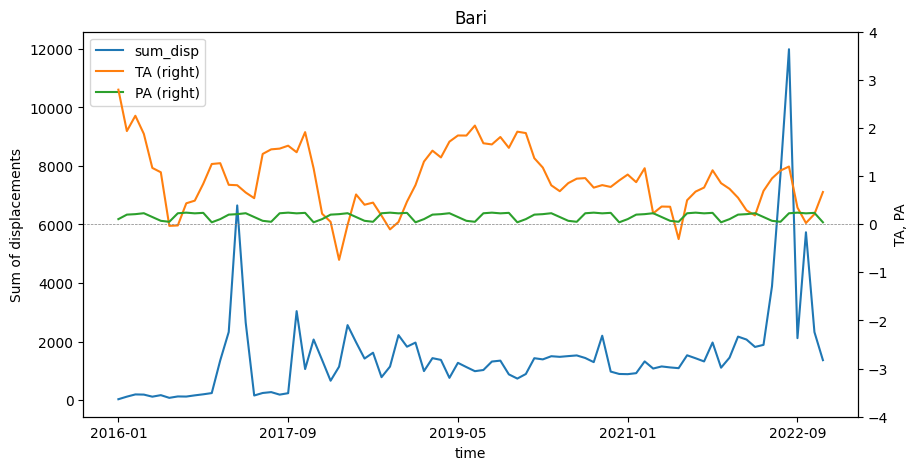

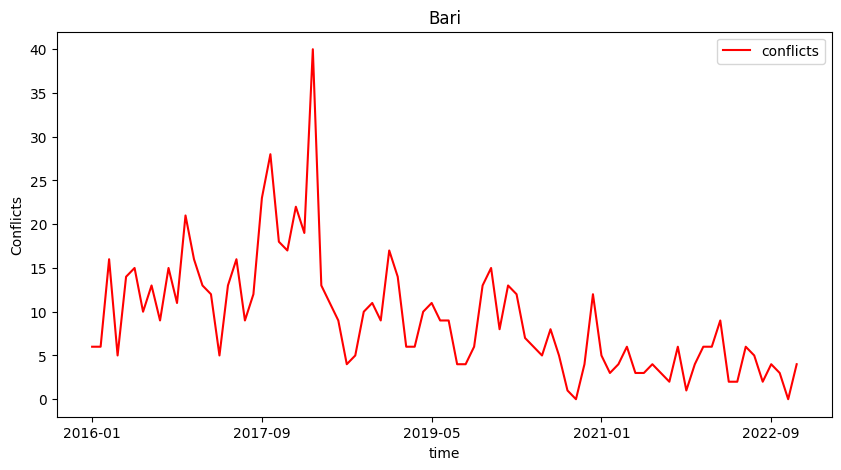

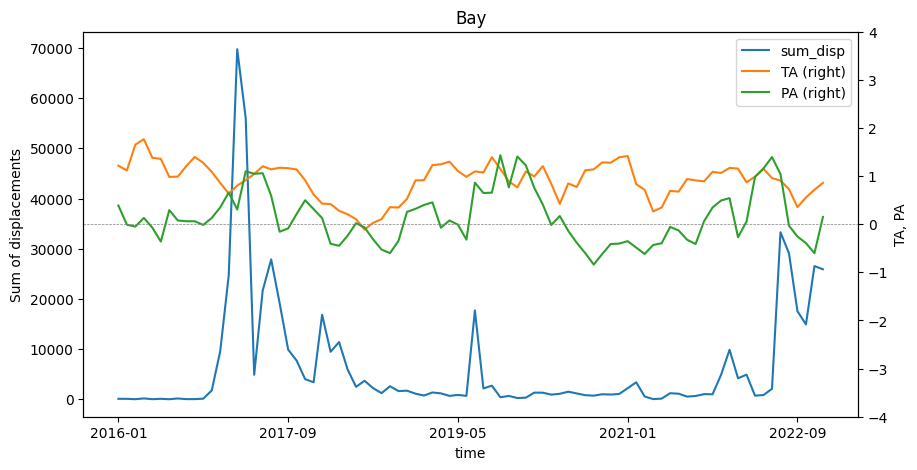

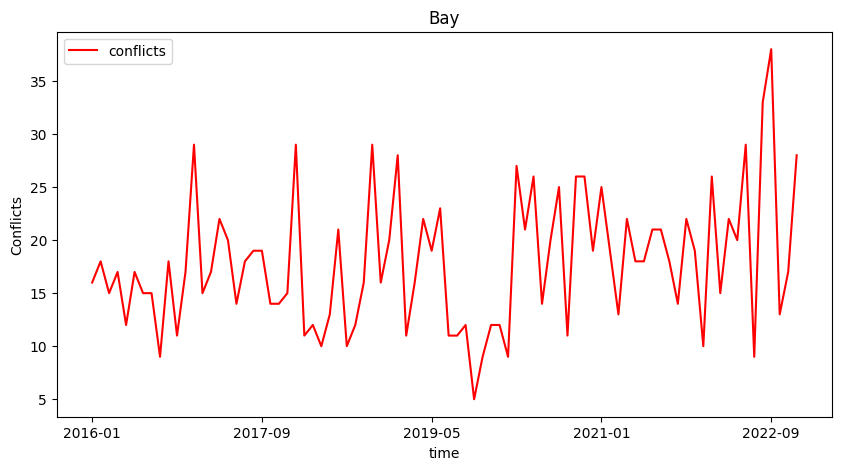

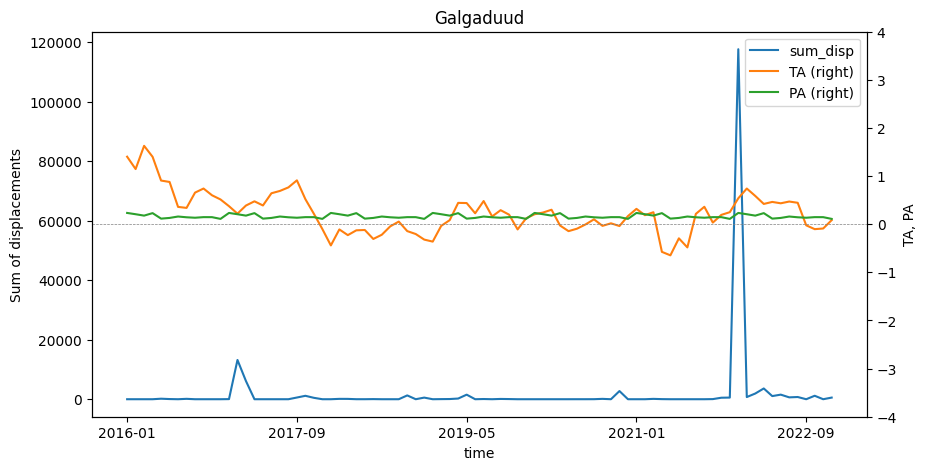

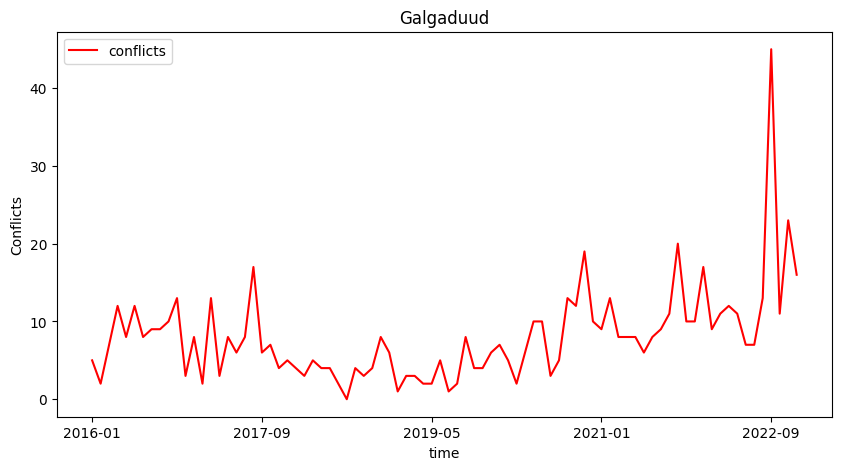

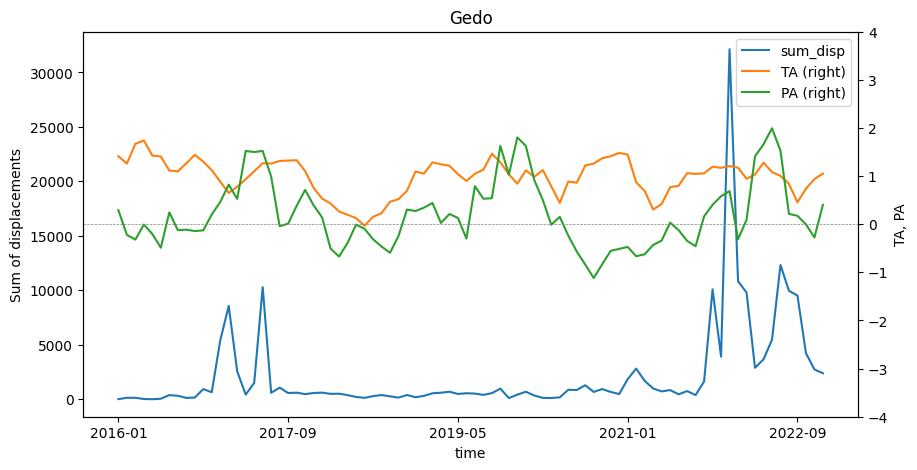

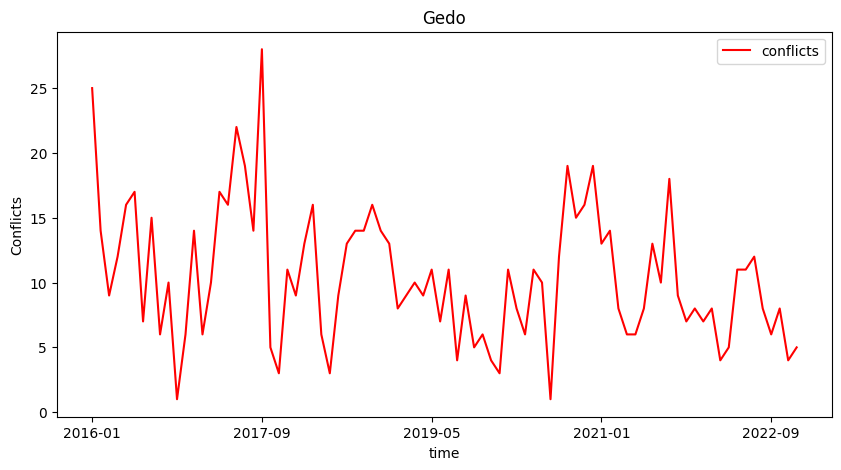

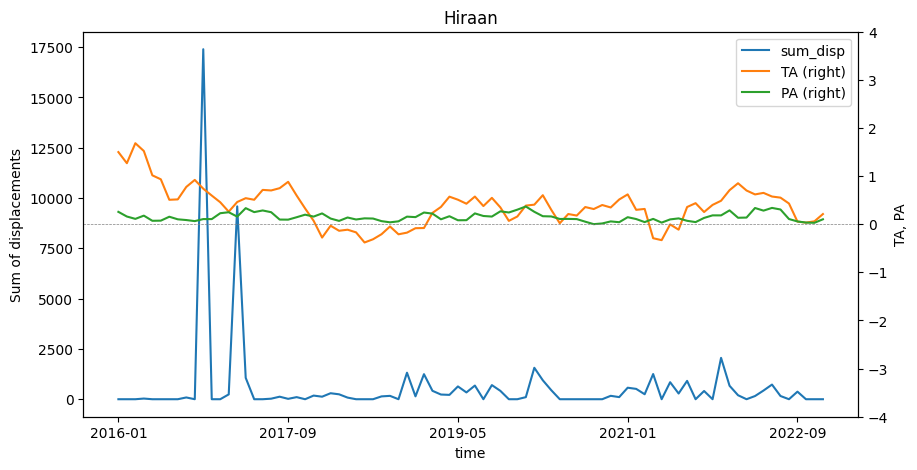

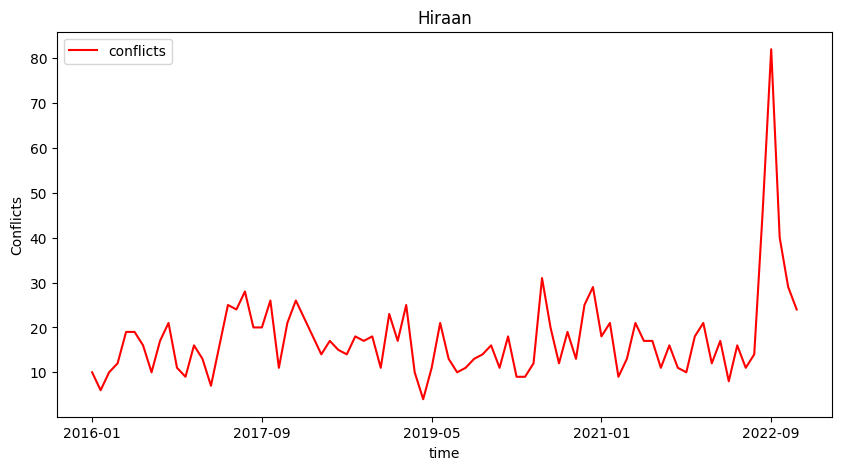

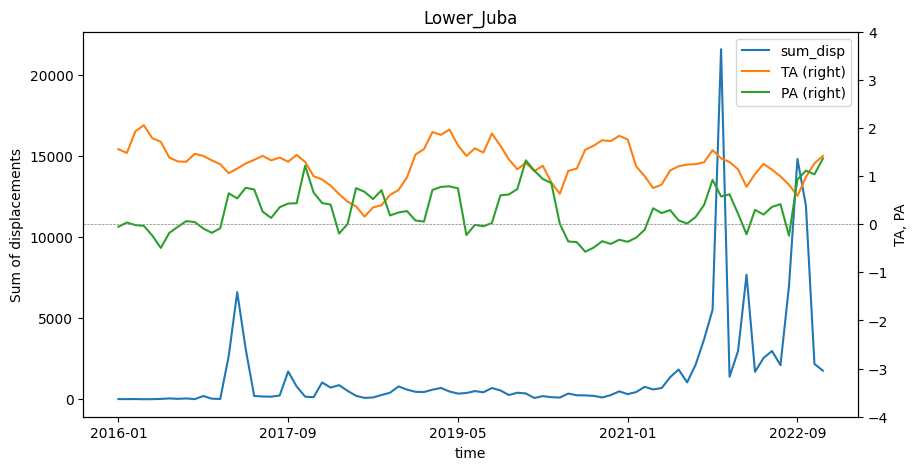

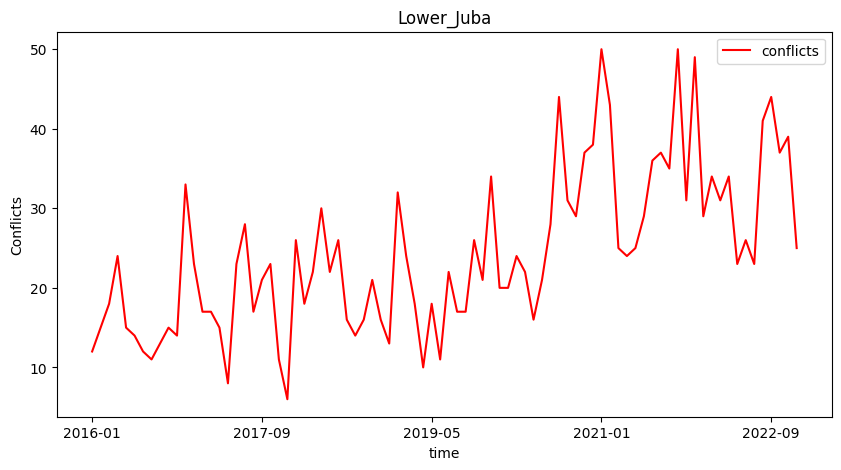

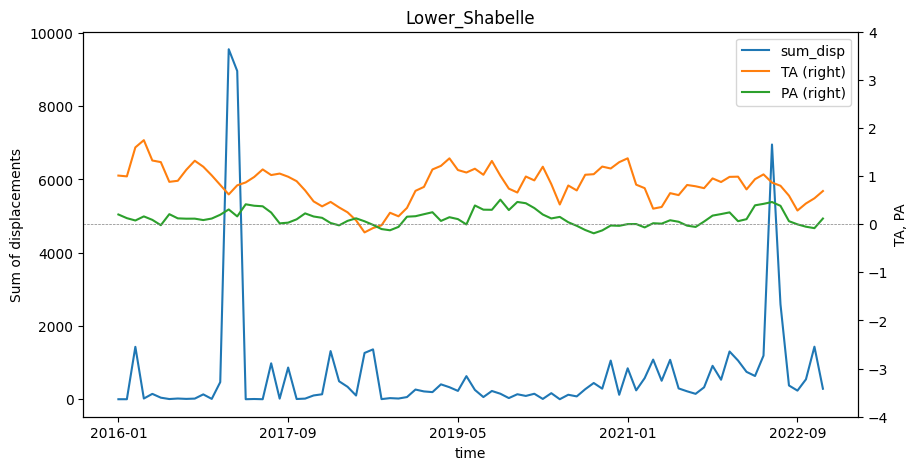

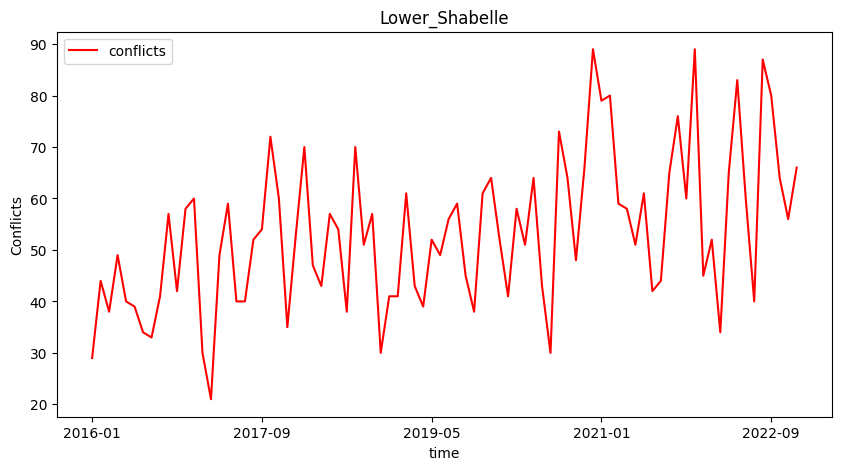

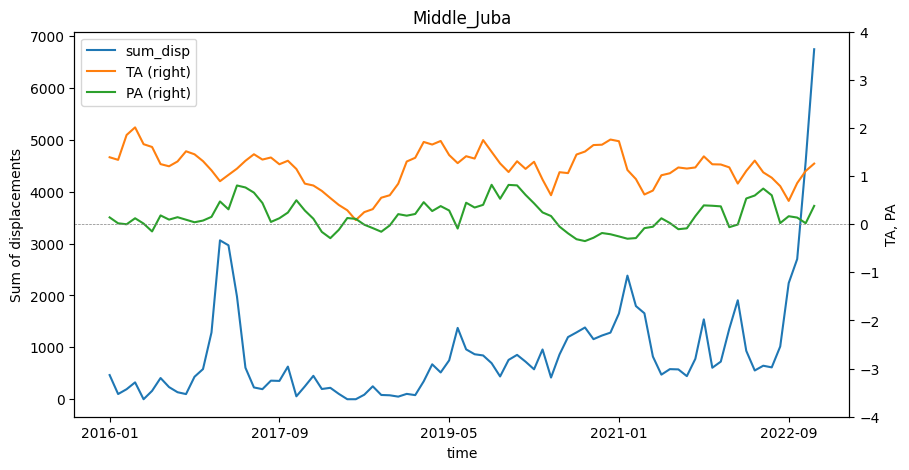

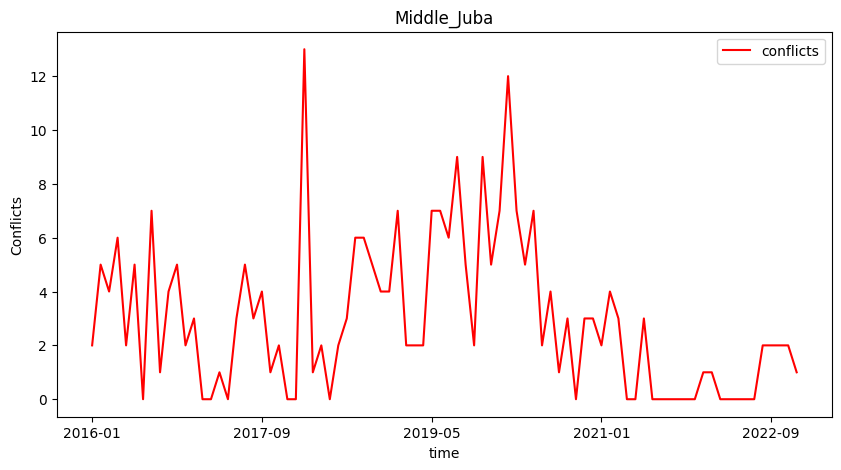

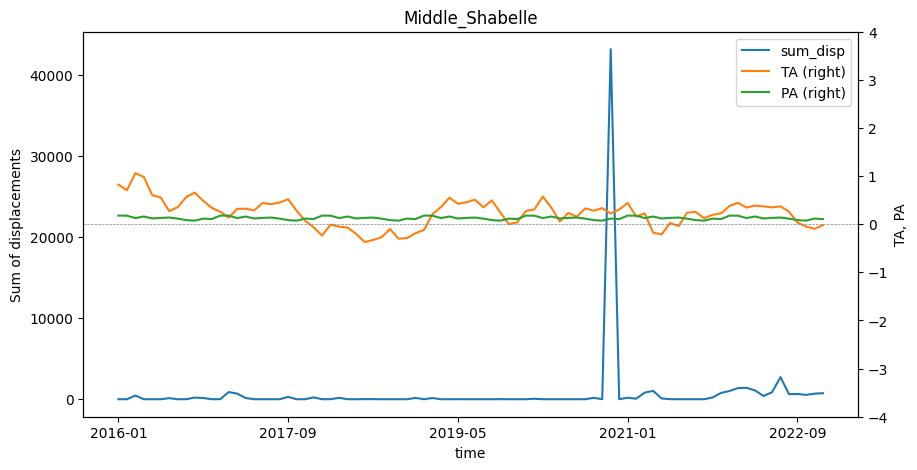

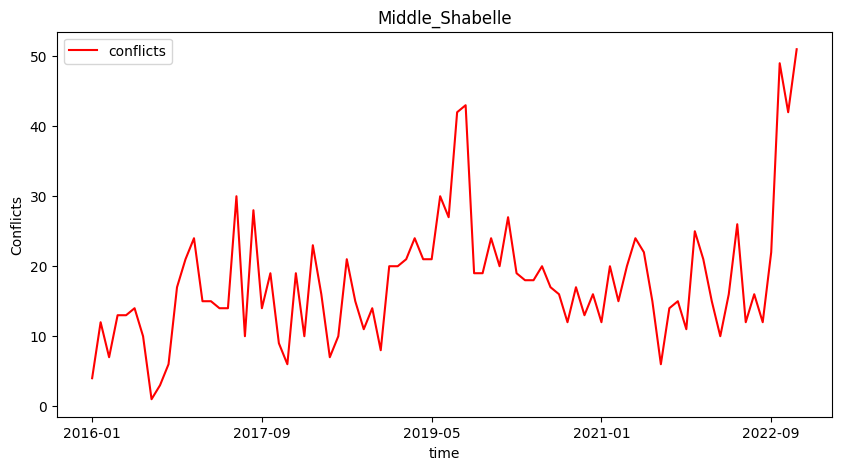

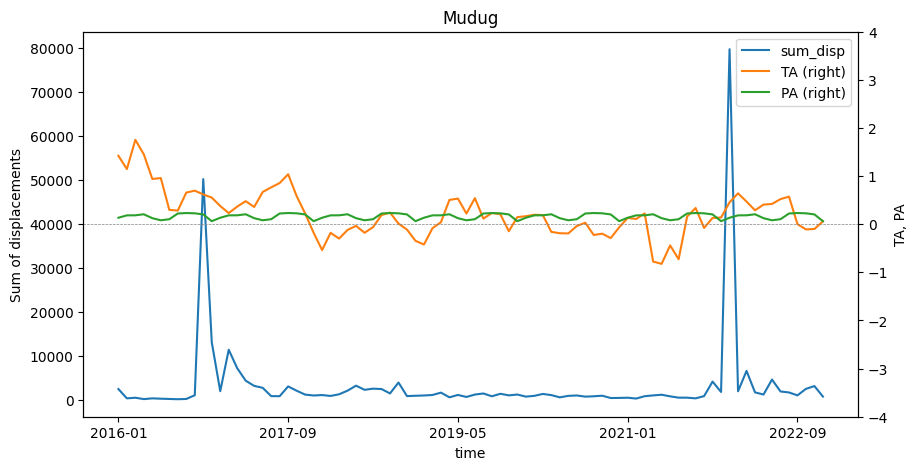

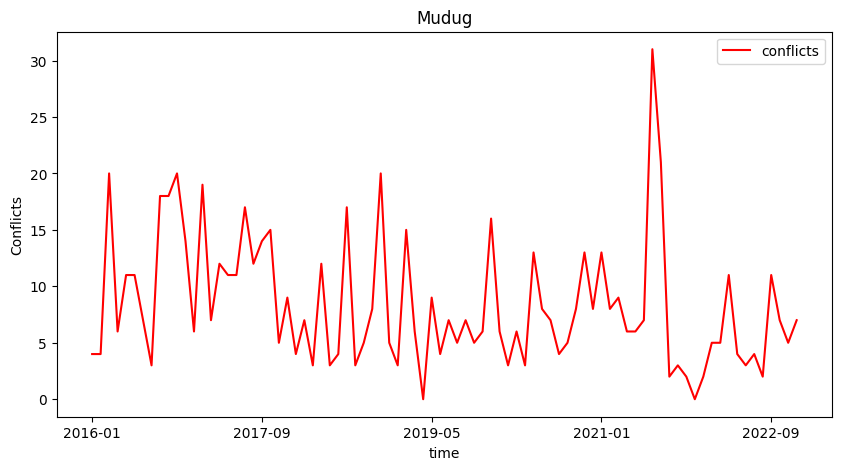

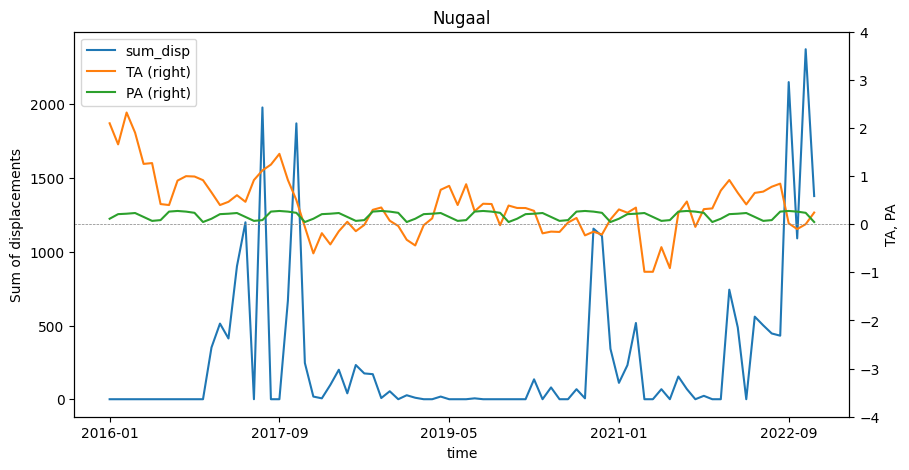

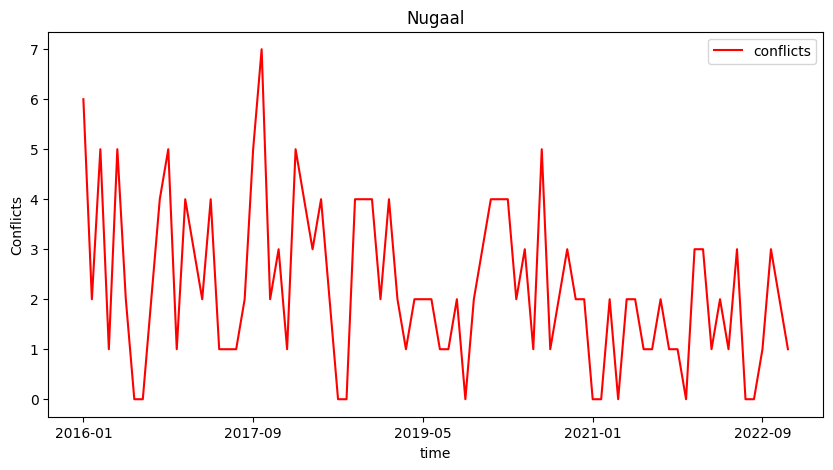

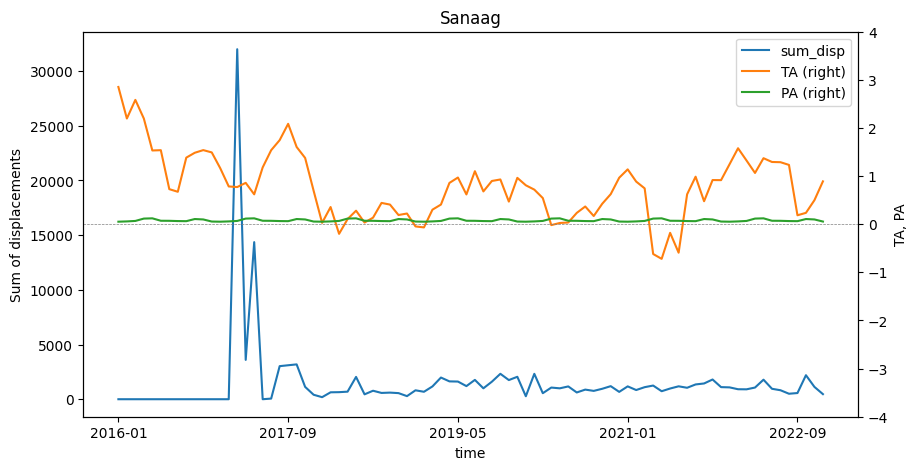

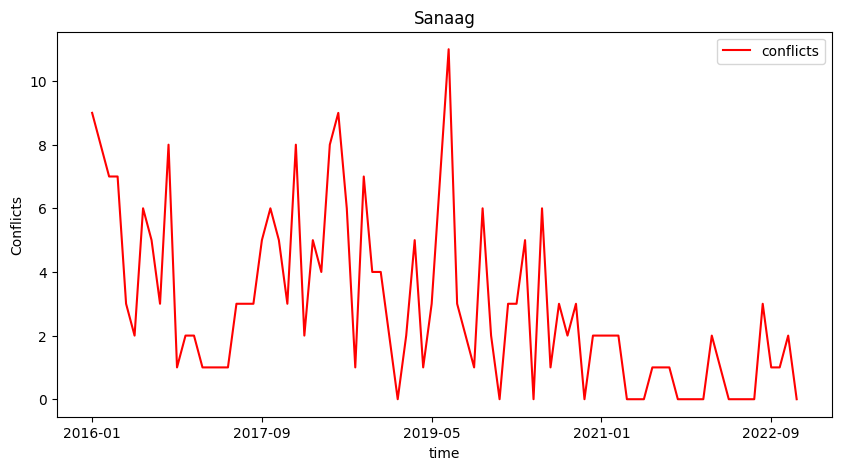

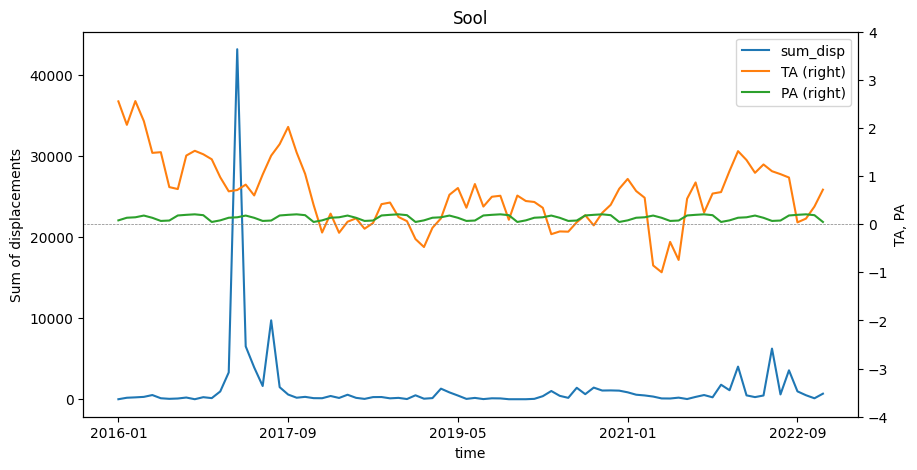

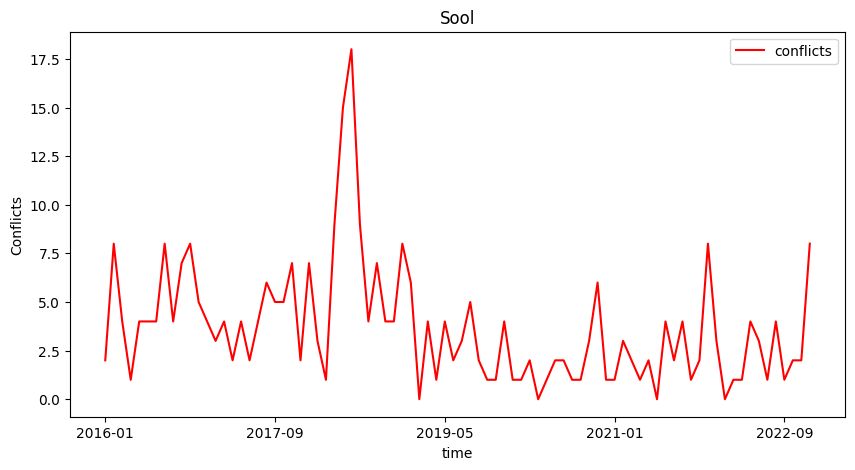

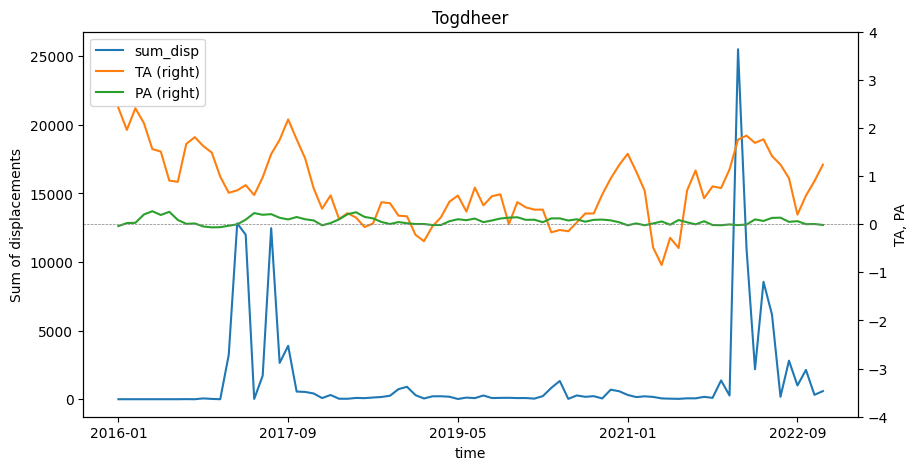

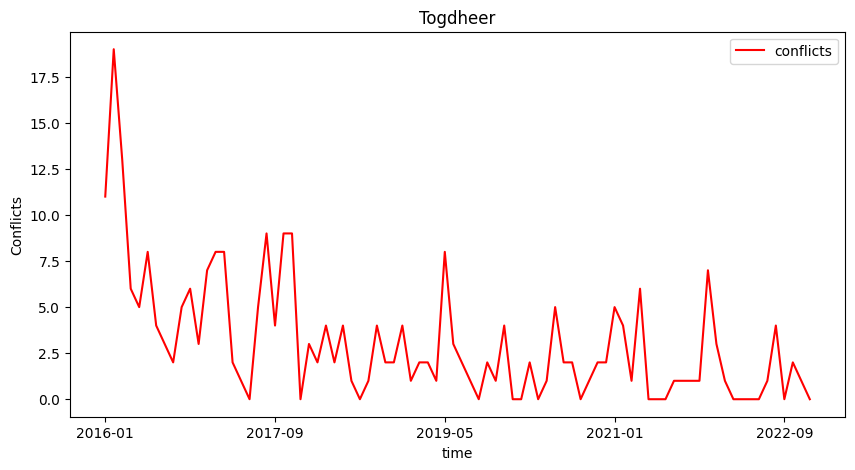

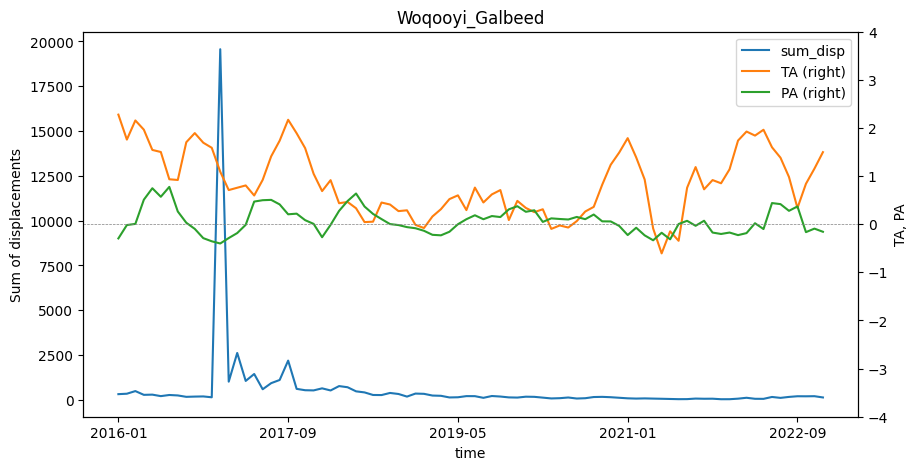

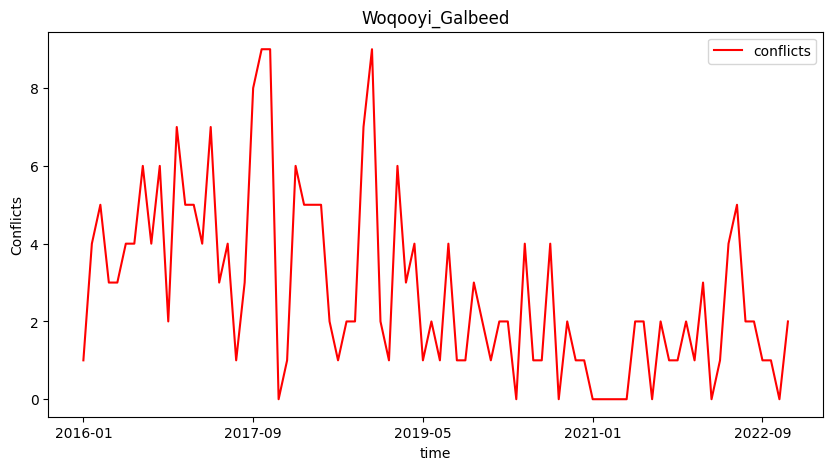

In [7]:
for region in df_d['admin1'].unique():
    ap = df_d[df_d['admin1']==region]
    aw = ap[['time','sum_disp','TA','PA']]
    aw = aw.set_index('time')

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig1 = aw.plot(secondary_y=['TA','PA'], mark_right=True, figsize=(10,5))
    fig1.set_ylabel('Sum of displacements')
    fig1.right_ax.set_ylabel('TA, PA')
    #ax.set_ylim(-2, 3)
    fig1.right_ax.set_ylim(-4, 4)
    plt.title(region)
    for i in range(-4, 6):
        plt.axhline(y=i*10, color='grey', linestyle='--', linewidth=0.5)
    plt.show()
    ay = ap[['time','conflicts']]
    ay = ay.set_index('time')
    fig2 = ay.plot(color='red', mark_right=True, figsize=(10,5)) 
    fig2.set_ylabel('Conflicts')
    plt.title(region)
    plt.show()

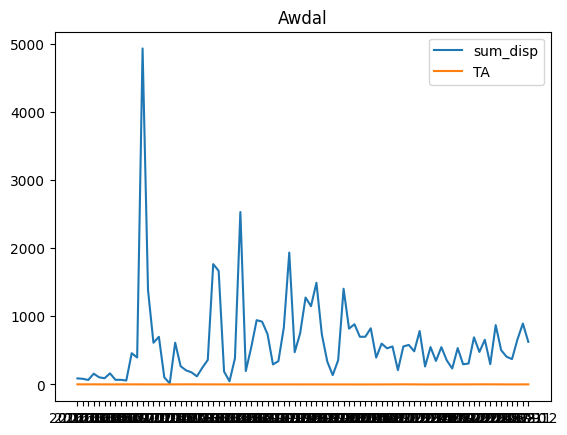

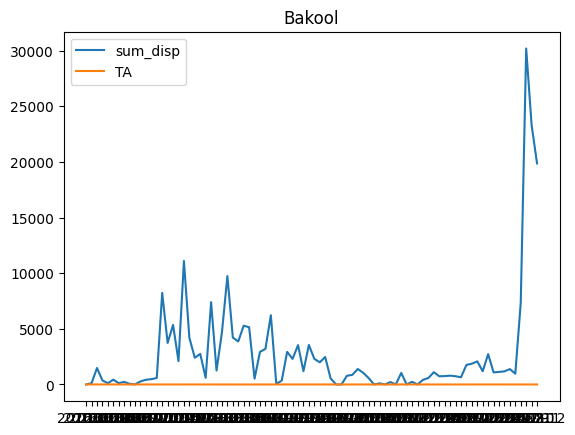

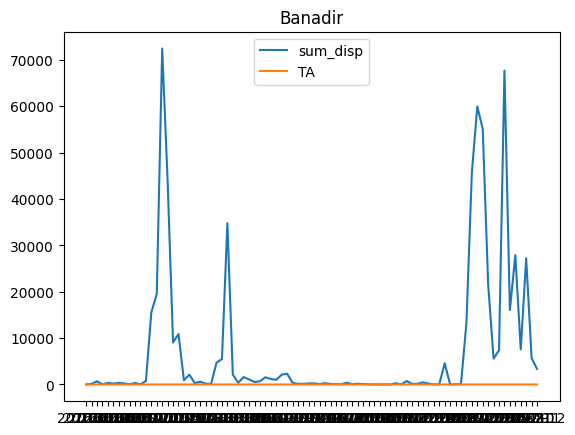

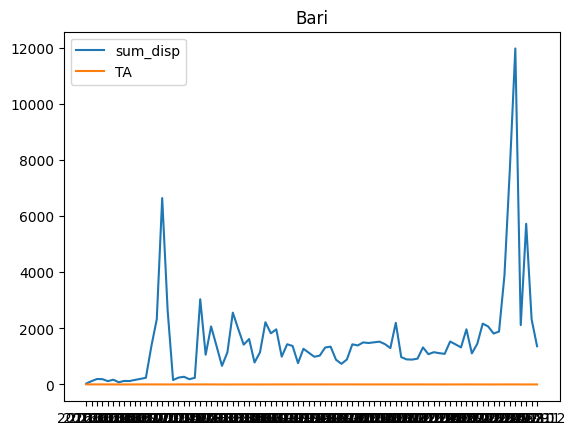

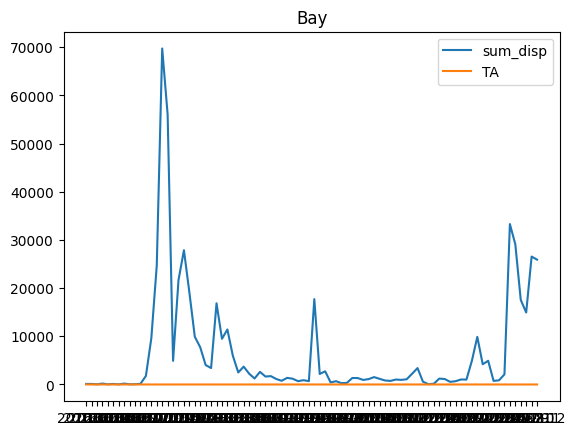

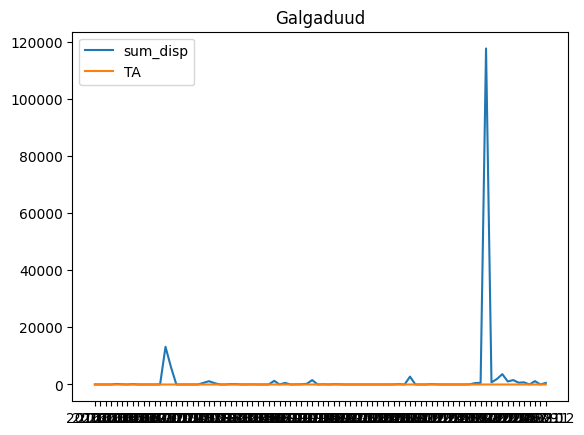

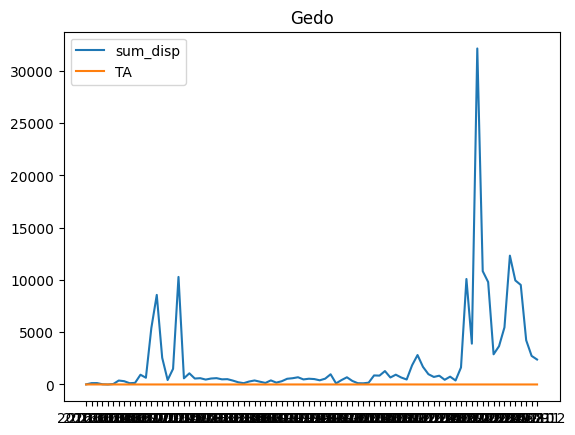

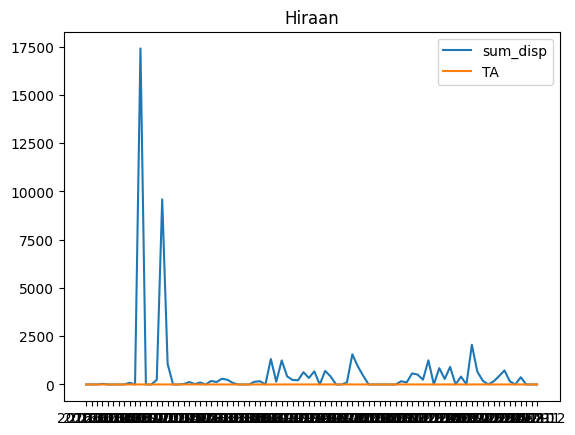

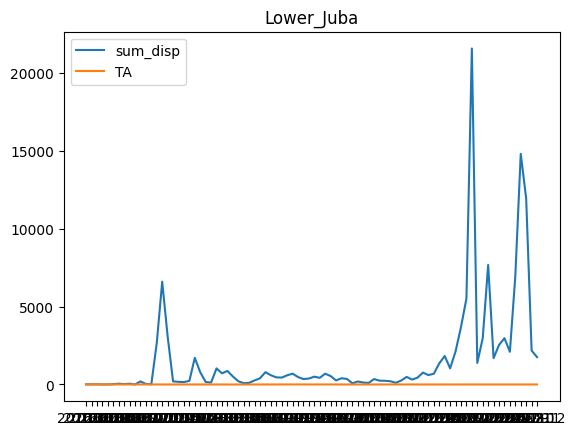

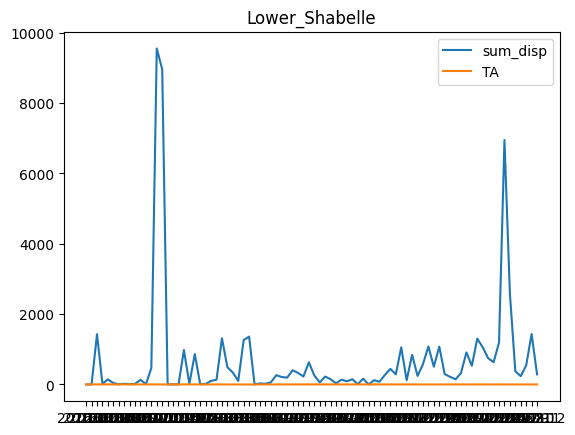

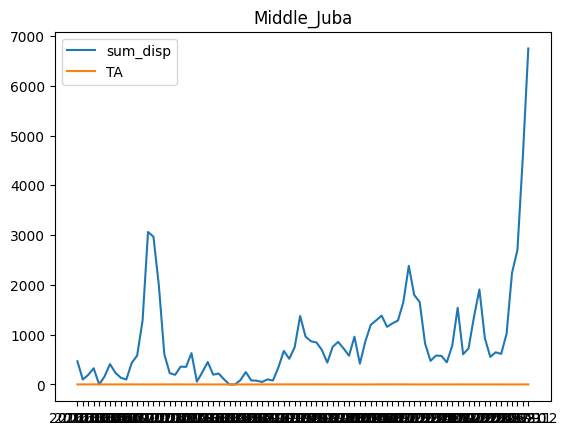

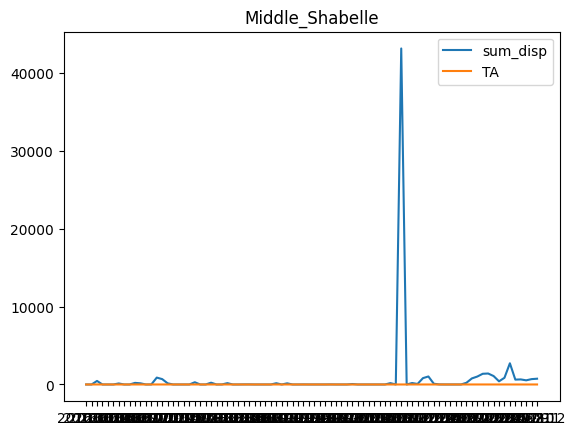

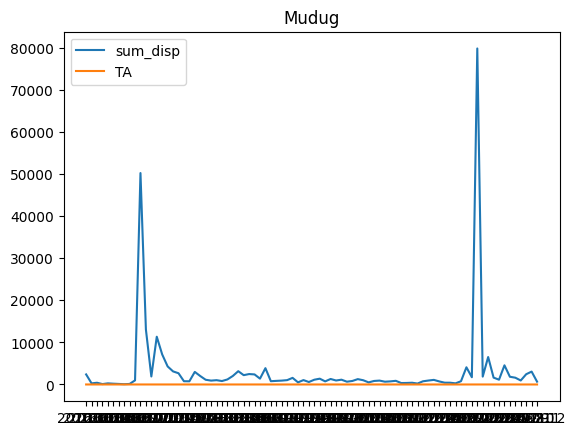

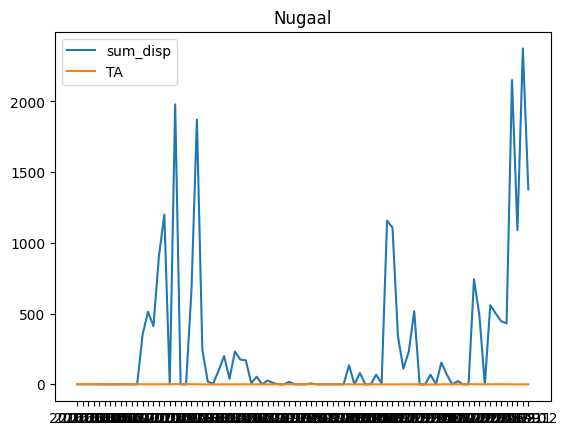

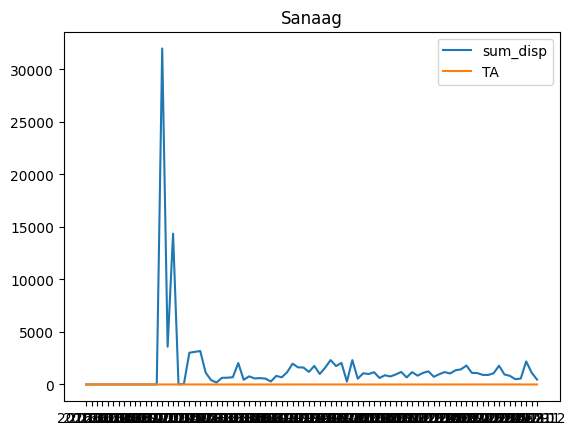

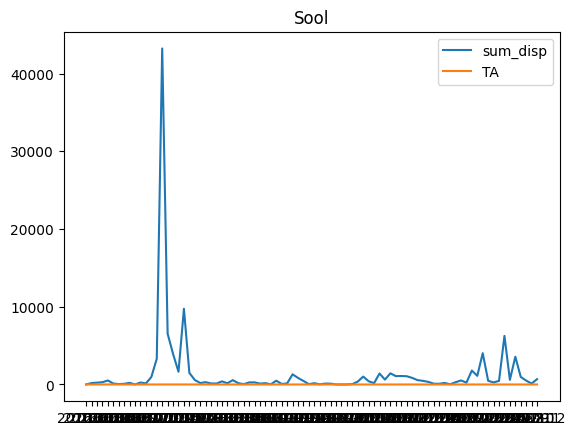

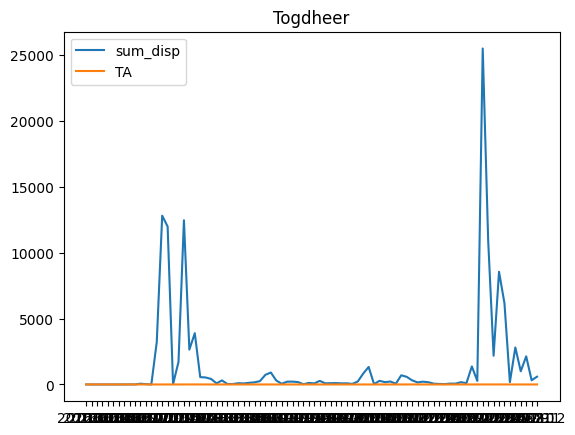

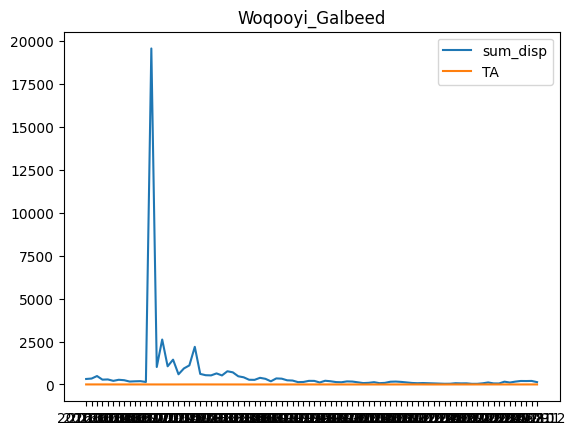

In [21]:
#plot number of individuals against time for each region
for region in df_d['admin1'].unique():
    plt.plot(df_d[df_d['admin1']==region]['time'],df_d[df_d['admin1']==region]['sum_disp'], label='sum_disp')
    plt.plot(df_d[df_d['admin1']==region]['time'],df_d[df_d['admin1']==region]['TA'], label='TA')
    plt.title(region)
    plt.legend()
    plt.show()

In [ ]:
arr = disp_data.pivot_table(index=['time','Current (Arrival) Region'], columns='Previous (Departure) Region', values='Number of Individuals', aggfunc='sum')

In [ ]:
#reset index
disp_data.groupby(['time','Current (Arrival) Region']).sum().reset_index()

,time,Current (Arrival) Region,Previous (Departure) Region,Number of Individuals
0,2016-01-31,Awdal,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,89
1,2016-01-31,Bakool,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,0
2,2016-01-31,Banadir,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,0
3,2016-01-31,Bari,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,31
4,2016-01-31,Bay,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,114
...,...,...,...,...
1651,2023-08-31,Nugaal,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,500
1652,2023-08-31,Sanaag,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,0
1653,2023-08-31,Sool,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,54
1654,2023-08-31,Togdheer,BakoolBanadirBariBayGalgaduudGedoHiraanLower J...,266
